In [97]:
library(tidyverse)
library(tidyr)
library(e1071)

In [98]:
egdi <- read.csv('EGOV_DATA_2024.csv') %>%
    arrange(Country.Name) %>%
    select(
            Country.Name,
            E.Government.Index,
            E.Participation.Index, 
            Online.Service.Index, 
            Human.Capital.Index, 
            Telecommunication.Infrastructure.Index
        )

In [99]:
egdi_brasil <- egdi %>% 
    filter(Country.Name == 'Brazil')

In [100]:
egdi_mundo <- egdi %>% 
    filter(Country.Name != 'Brazil')

In [101]:
skewness(egdi_mundo$E.Government.Index)

[1] -0.4030955

In [102]:
df = data.frame(
    paises = c(
        'Mundo', 
        'Brasil'),
    egdi = c(
        median(egdi_mundo$E.Government.Index),
        egdi_brasil$E.Government.Index
    ),
    epart = c(
        median(egdi_mundo$E.Participation.Index),
        egdi_brasil$E.Participation.Index
    ),
    osi = c(
        median(egdi_mundo$Online.Service.Index),
        egdi_brasil$Online.Service.Index
    ),
    hci = c(
        median(egdi_mundo$Human.Capital.Index),
        egdi_brasil$Human.Capital.Index
    ),
    tci = c(
        median(egdi_mundo$Telecommunication.Infrastructure.Index),
        egdi_brasil$Telecommunication.Infrastructure.Index
    )
)

In [103]:
df_long <- df %>%
  pivot_longer(cols = -paises,
               names_to = "indicador",
               values_to = "valor")

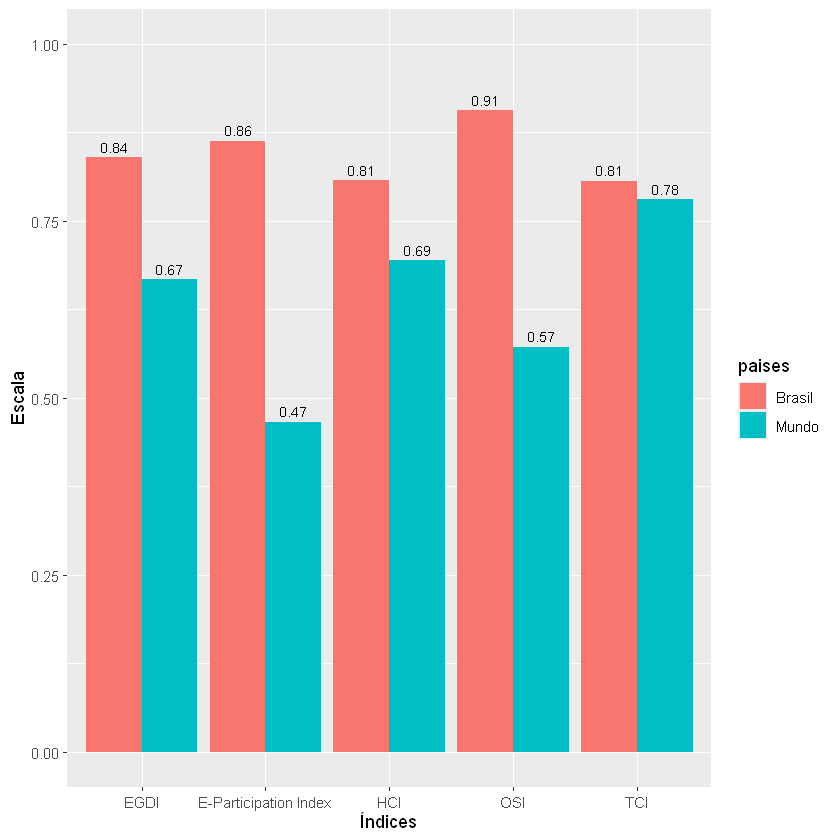

In [104]:
ggplot(df_long, aes(indicador, valor, fill = paises)) +
    geom_col(position = "dodge") +
    scale_x_discrete(labels = c('EGDI', 'E-Participation Index', 'HCI', 'OSI', 'TCI')) +
    geom_text(
        aes(label = round(valor, 2)),
        vjust = -0.5,    
        position = position_dodge(width = 0.9), 
        size = 3
    ) +
    coord_cartesian(ylim = c(0, 1)) +
    labs(
        x = 'Índices',
        y = 'Escala'
    )

In [105]:
ggsave(
    'C:/Users/lazar/Master-Dissertation/figuras/comparacao_egdi_brasil_mundo.png', 
    dpi=300,
    width = 25.4,
    height = 15.24,
    units = "cm"
)